# Bayes Decision

1. เขียนโปรแกรมสำหรับสร้างตัวจำแนกแบบเบส์สำหรับการแจกแจงปรกติตัวแปรเดียว กรณีที่ความแปรปรวนของทั้งสองคลาสเท่ากัน
2. เขียนโปรแกรมสำหรับสร้างตัวจำแนกแบบเบส์สำหรับการแจกแจงปรกติตัวแปรเดียว กรณีที่ความแปรปรวนของทั้งสองคลาสไม่เท่ากัน


In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [11]:
iris = load_iris()
X = iris.data  # Use all features (assume that they're all independent features)
y = iris.target

# Get only 2 classes
X = X[y != 2] 
y = y[y != 2]

# Convert to pandas DataFrame for better visualization
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculate mean and std for each feature in both classes
mean_0 = np.mean(X_train[y_train == 0], axis=0)
mean_1 = np.mean(X_train[y_train == 1], axis=0)
std_0 = np.std(X_train[y_train == 0], axis=0)
std_1 = np.std(X_train[y_train == 1], axis=0)

In [13]:
# Calculate priors for both classes
prior_0 = np.mean(y_train == 0)
prior_1 = np.mean(y_train == 1)

In [14]:
# Gaussian Probability Density Function
def likelihood(x, mean, std):
    return 1.0 / (np.sqrt(2 * np.pi) * std) * np.exp(-((x - mean) ** 2) / (2 * std ** 2))

## Plot Likelihood and Posterior

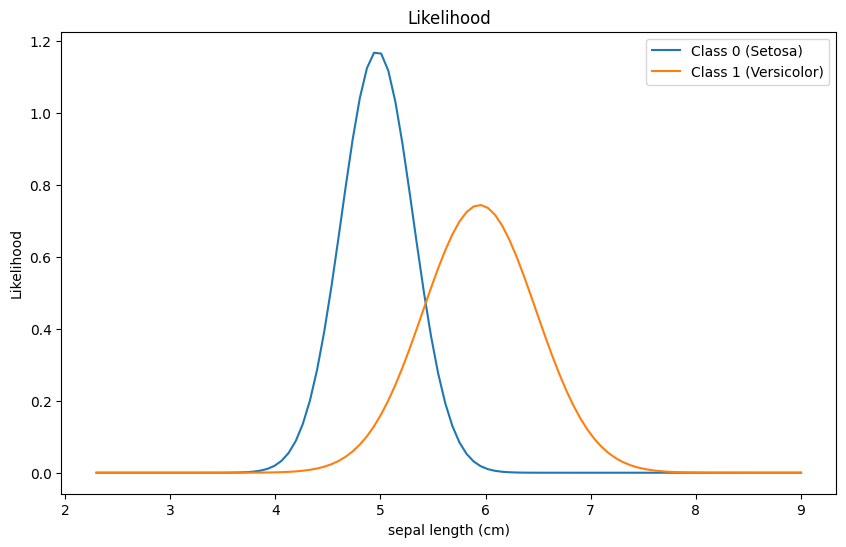

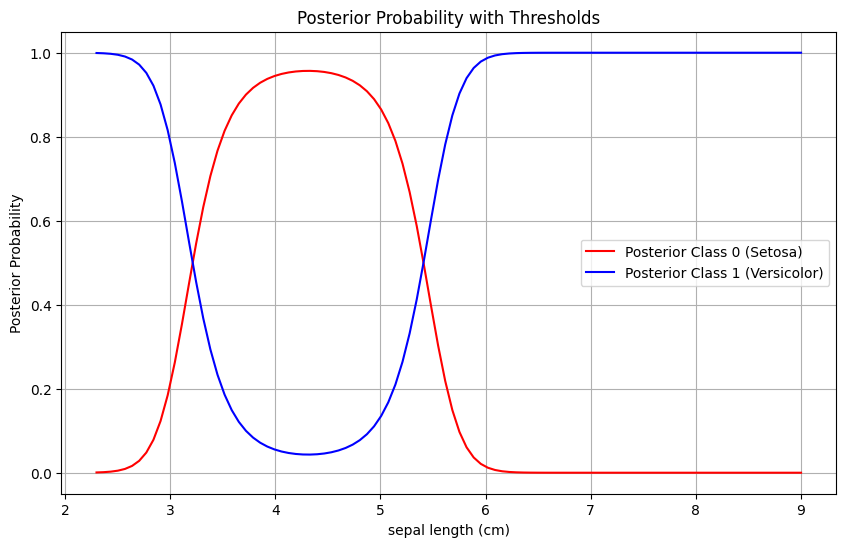

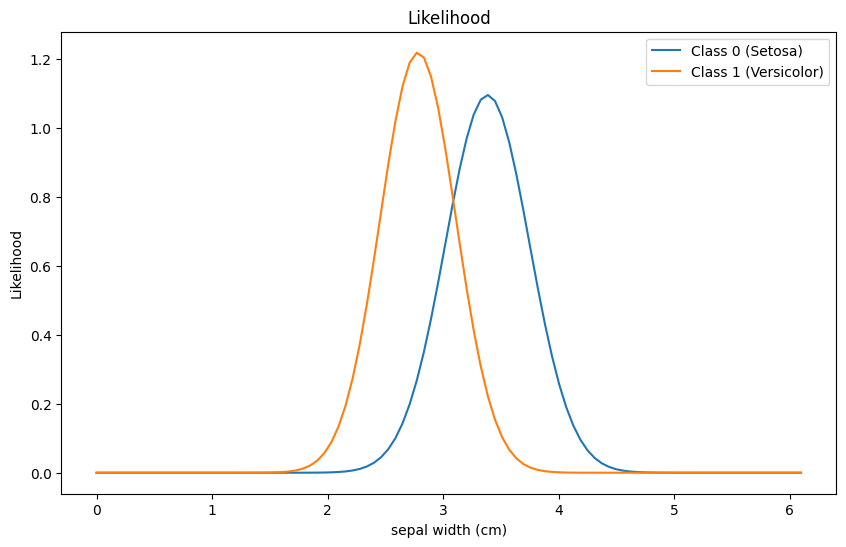

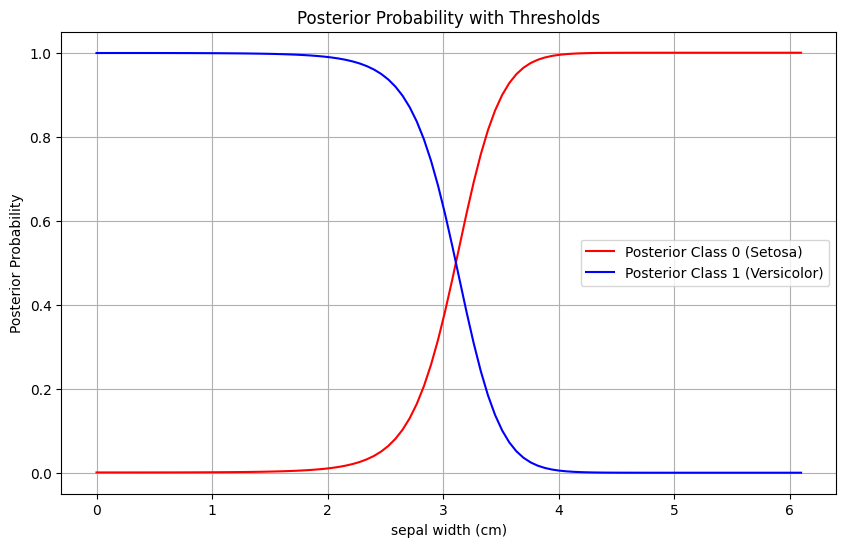

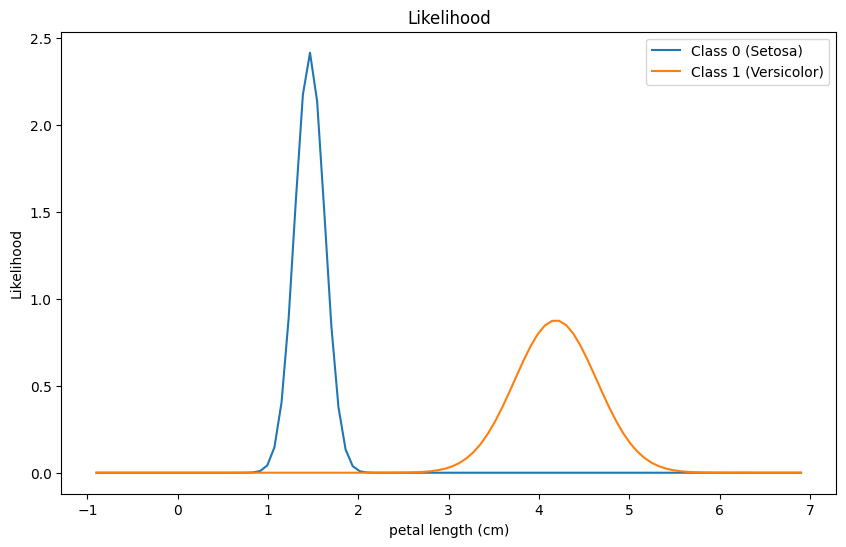

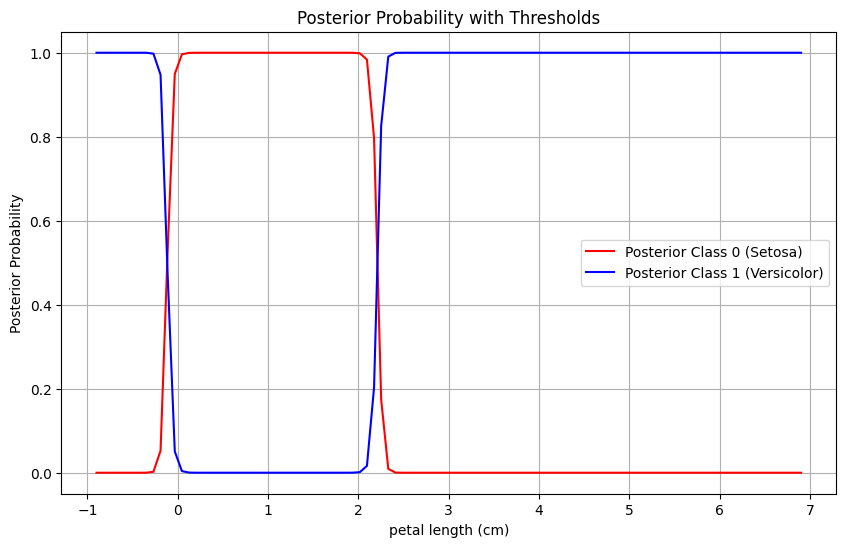

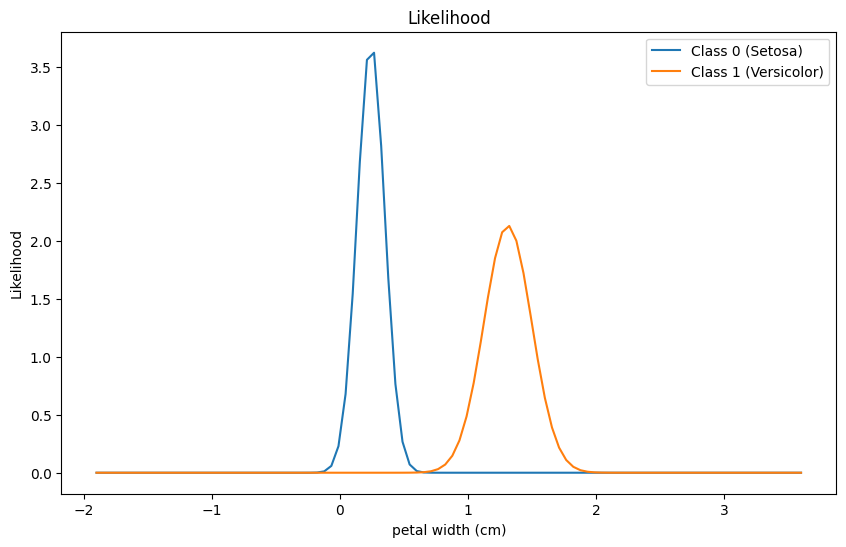

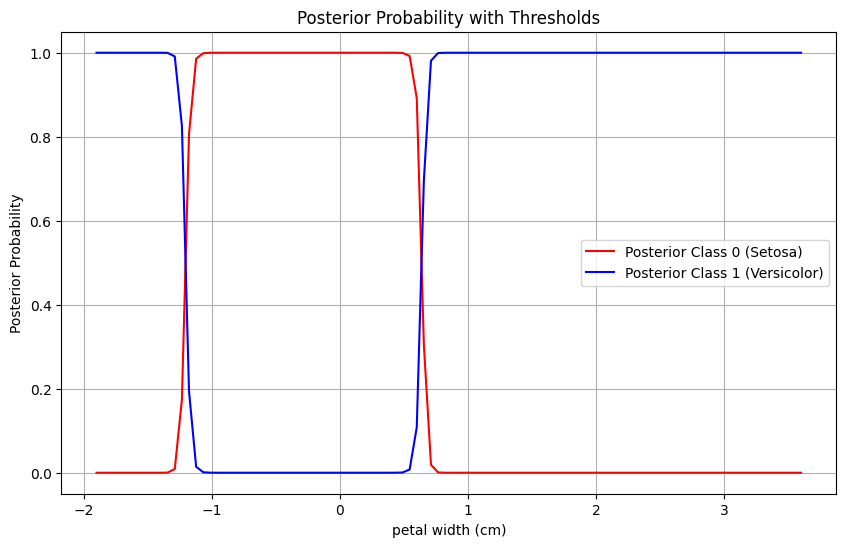

In [15]:
iris = iris.feature_names
feature_n = 0
for i in range(X_train.shape[1]):
    # Specific X data with the min to max range as 100 samples to create gaussian distribution
    X_range = np.linspace(np.min(X_train[:, i]) - 2, np.max(X_train[:, i]) + 2, 100)
    
    likelihood_0 = likelihood(X_range, mean_0[i], std_0[i])
    likelihood_1 = likelihood(X_range, mean_1[i], std_1[i])
    
    posterior_0 = likelihood_0 * prior_0
    posterior_1 = likelihood_1 * prior_1
    
    # Normalize posterior probabilities to have prob 0 to 1
    evidence = posterior_0 + posterior_1
    posterior_0 /= evidence
    posterior_1 /= evidence
    
    plt.figure(figsize=(10, 6))
    plt.plot(X_range, likelihood_0, label='Class 0 (Setosa)')
    plt.plot(X_range, likelihood_1, label='Class 1 (Versicolor)')
    plt.title(f'Likelihood')
    plt.xlabel(f'{iris[feature_n]}')
    plt.ylabel('Likelihood')
    plt.legend()

    plt.figure(figsize=(10, 6))
    plt.plot(X_range, posterior_0, label='Posterior Class 0 (Setosa)', color='r')
    plt.plot(X_range, posterior_1, label='Posterior Class 1 (Versicolor)', color='b')
    
    plt.title(f'Posterior Probability with Thresholds')
    plt.xlabel(f'{iris[feature_n]}')
    plt.ylabel('Posterior Probability')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    feature_n += 1

## Plot Decision Boundary

In [16]:
# Bayes Decision Rule
def classify(X, mean_0, mean_1, std_0, std_1):
    likelihood_0 = likelihood(X, mean_0, std_0)
    likelihood_1 = likelihood(X, mean_1, std_1)
    
    # Posterior probability
    posterior_0 = np.prod(likelihood_0, axis=1) * prior_0
    posterior_1 = np.prod(likelihood_1, axis=1) * prior_1
    
    return np.where(posterior_0 > posterior_1, 0, 1), posterior_0, posterior_1

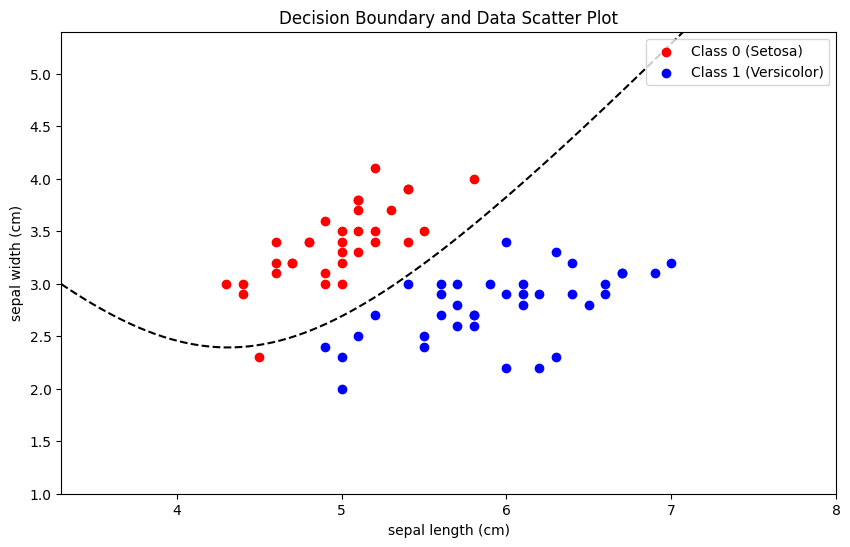

In [17]:
feature_0 = 0  # sepal length
feature_1 = 1  # sepal width

x_min, x_max = X[:, feature_0].min() - 1, X[:, feature_0].max() + 1
y_min, y_max = X[:, feature_1].min() - 1, X[:, feature_1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

grid_points = np.c_[xx.ravel(), yy.ravel()]

_, posterior_0, posterior_1 = classify(grid_points, mean_0[:2], mean_1[:2], std_0[:2], std_1[:2])

evidence = posterior_0 + posterior_1
posterior_0 /= evidence
posterior_1 /= evidence

# Reshape for contour plotting
posterior_0 = posterior_0.reshape(xx.shape)
posterior_1 = posterior_1.reshape(xx.shape)

# Plot decision boundary and data points
plt.figure(figsize=(10, 6))

# plot for decision boundary
# plt.contourf(xx, yy, posterior_0 - posterior_1, alpha=0.3, levels=[-1, 0, 1], colors=['blue', 'red'])
plt.contour(xx, yy, posterior_0 - posterior_1, levels=[0], colors='black', linestyles='--')

# Scatter plot of training data
plt.scatter(X_train[y_train == 0][:, feature_0], X_train[y_train == 0][:, feature_1], label='Class 0 (Setosa)', color='red')
plt.scatter(X_train[y_train == 1][:, feature_0], X_train[y_train == 1][:, feature_1], label='Class 1 (Versicolor)', color='blue')

plt.xlabel(iris[feature_0])
plt.ylabel(iris[feature_1])
plt.legend()
plt.title('Decision Boundary and Data Scatter Plot')
plt.show()

In [18]:
y_pred, _, _ = classify(X_test, mean_0, mean_1, std_0, std_1)
print(confusion_matrix(y_test, y_pred))

[[17  0]
 [ 0 13]]
